# Case Study 4

In [7]:
import pandas as pd
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample

In [8]:
# List to store the dataframes
dataframes = []

# Loop through the file names and read the data into dataframes
for i in range(1, 6):
    file_name = f'{i}year.arff'
    
    # If the files are in ARFF format, use loadarff to load the data
    raw_data, meta = loadarff(file_name)
    df = pd.DataFrame(raw_data)
    
    # Append the dataframe to the list
    dataframes.append(df)

In [9]:
display(dataframes[0])

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,b'1'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,b'1'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,b'1'


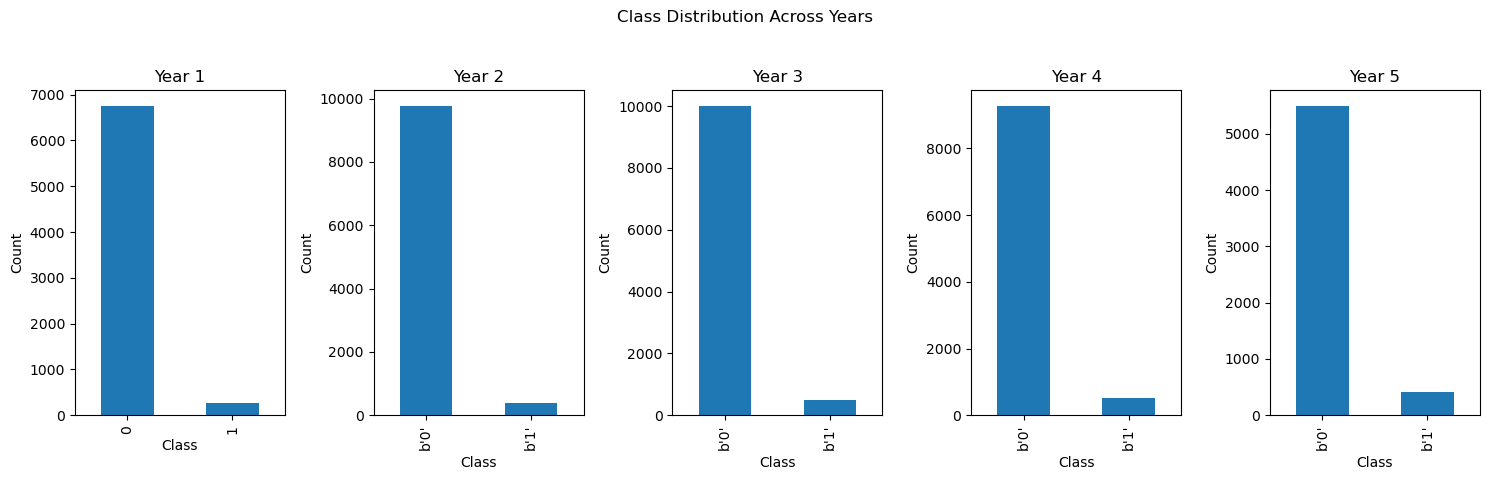

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=len(dataframes), figsize=(15, 5))
fig.suptitle('Class Distribution Across Years')

for i, df in enumerate(dataframes):
    df['class'].value_counts().plot(kind='bar', ax=axes[i], title=f'Year {i+1}')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Count')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

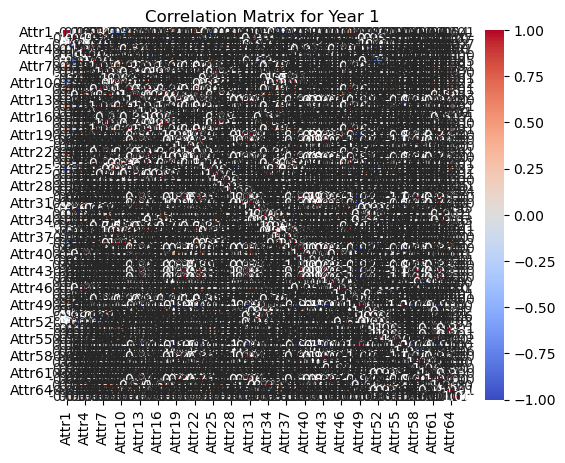

In [14]:
# Example with DataFrame 1
corr_matrix = dataframes[0].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix for Year 1')
plt.show()

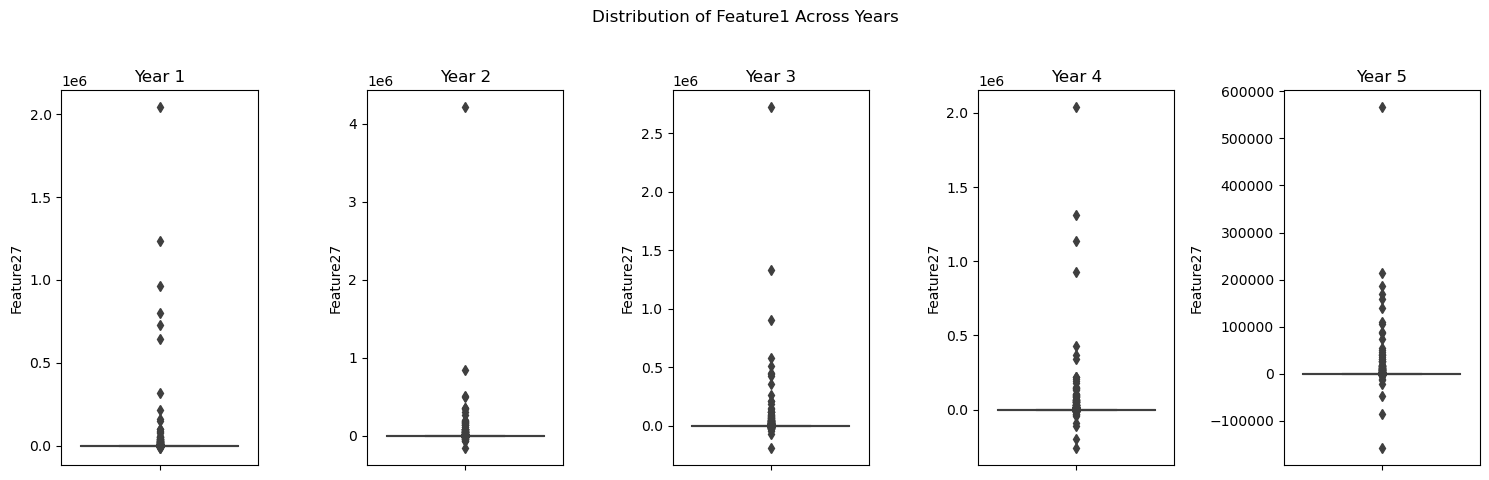

In [18]:
# Example with a feature named 'feature1'
fig, axes = plt.subplots(nrows=1, ncols=len(dataframes), figsize=(15, 5))
fig.suptitle('Distribution of Feature1 Across Years')

for i, df in enumerate(dataframes):
    sns.boxplot(y=df['Attr27'], ax=axes[i])
    axes[i].set_title(f'Year {i+1}')
    axes[i].set_ylabel('Feature27')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

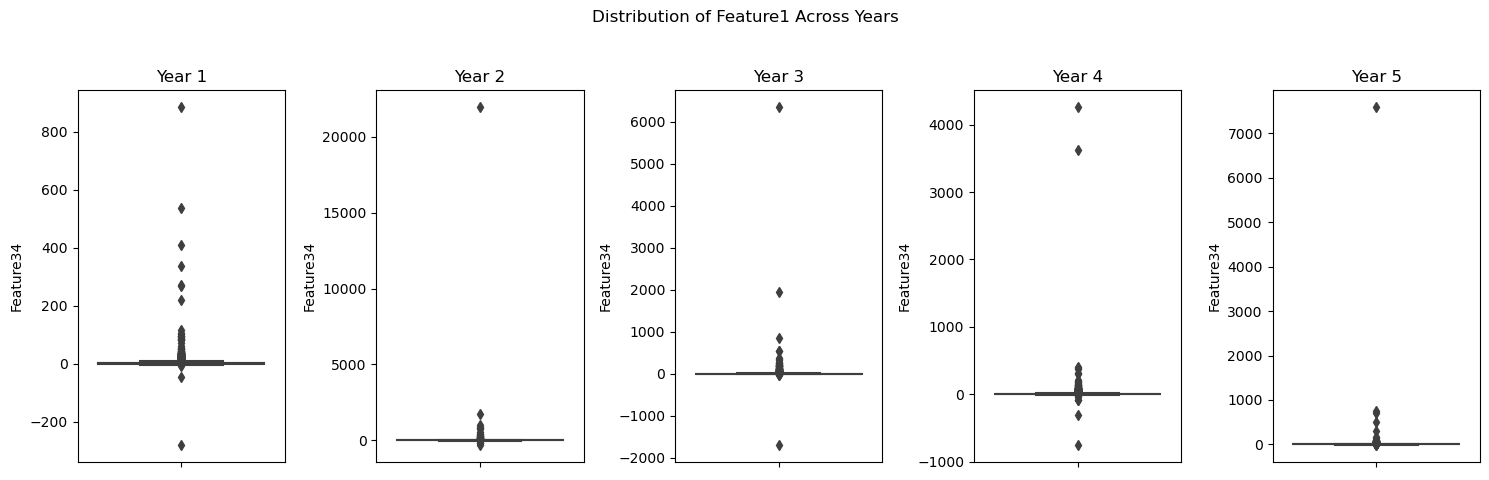

In [19]:
# Example with a feature named 'feature1'
fig, axes = plt.subplots(nrows=1, ncols=len(dataframes), figsize=(15, 5))
fig.suptitle('Distribution of Feature1 Across Years')

for i, df in enumerate(dataframes):
    sns.boxplot(y=df['Attr34'], ax=axes[i])
    axes[i].set_title(f'Year {i+1}')
    axes[i].set_ylabel('Feature34')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

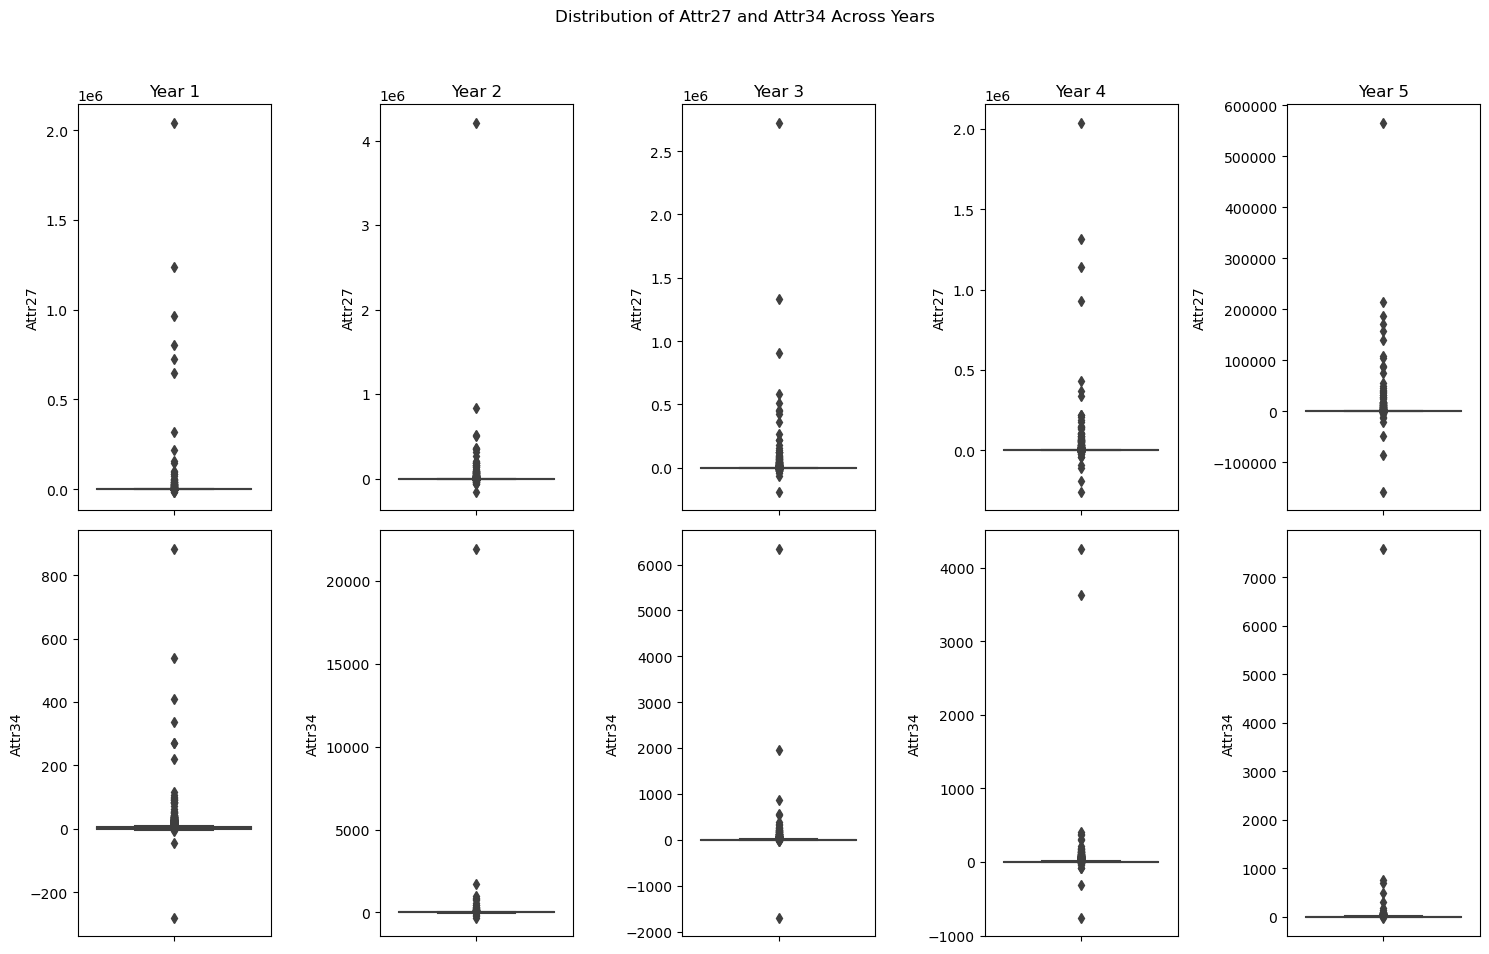

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=len(dataframes), figsize=(15, 10))
fig.suptitle('Distribution of Attr27 and Attr34 Across Years')

for i, df in enumerate(dataframes):
    # Boxplot for Attr27
    sns.boxplot(y=df['Attr27'], ax=axes[0, i])
    axes[0, i].set_title(f'Year {i+1}')
    axes[0, i].set_ylabel('Attr27')
    
    # Boxplot for Attr34
    sns.boxplot(y=df['Attr34'], ax=axes[1, i])
    axes[1, i].set_ylabel('Attr34')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


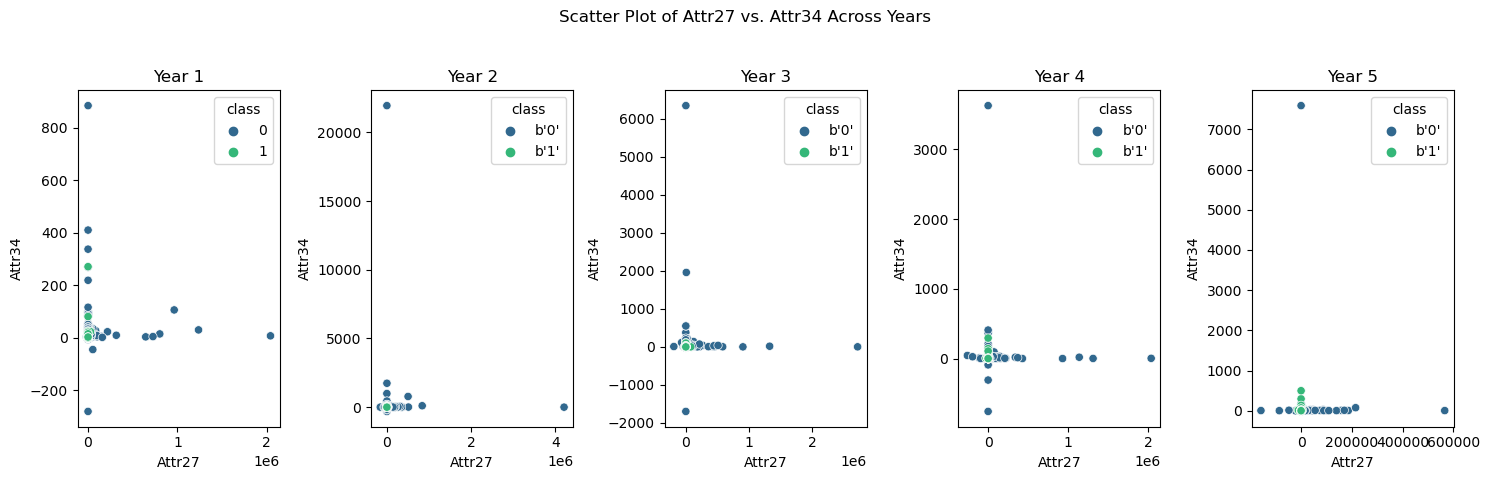

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=len(dataframes), figsize=(15, 5))
fig.suptitle('Scatter Plot of Attr27 vs. Attr34 Across Years')

for i, df in enumerate(dataframes):
    sns.scatterplot(x=df['Attr27'], y=df['Attr34'], hue=df['class'], ax=axes[i], palette="viridis")
    axes[i].set_title(f'Year {i+1}')
    axes[i].set_xlabel('Attr27')
    axes[i].set_ylabel('Attr34')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()